# 聚类

In [1]:
#导入必要的工具包
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.decomposition import PCA
import time

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('events2.csv')
data.head()

,Unnamed: 0,event_id,user_id,start_time,city,state,zip,country,lat,lng,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,0,1379185675,947978913,2012-09-13T02:00:00.003Z,Toronto,ON,NaN,Canada,43.648,-79.375,...,0,0,0,0,0,1,0,0,0,30
1,1,3189486214,1176436376,2012-10-28T20:00:00.003Z,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,14
2,2,4090120152,3416671649,2012-10-13T05:00:00.003Z,Long Beach,CA,NaN,United States,33.756,-118.108,...,0,0,0,0,0,0,0,0,2,17
3,3,899668139,1558385303,2012-11-18T04:00:00.003Z,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,8
4,4,1077498346,3631515235,2012-11-12T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,8


前面对数据进行筛选的时候可能没有对索引做处理，导致多了一行，不过不影响，在这里删除就是。另外，题目要求从count1开始（即去掉前9列），这里一并处理。

In [3]:
dels = data.columns[:10]
data = data.drop(dels,axis=1)
data.head()

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,0,1,1,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,30
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,14
2,2,0,2,0,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,2,17
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


这里有101维特征，但具体是什么也没有说明，0值特别多，没法做可视化，于是先做个降维试试

In [4]:
#pca = PCA(n_components=0.5)
#data = pca.fit_transform(data)
#data.shape

1维？？！感觉上是不对劲的，可能只是对这些特征做了某些加权和，但如果就这么去聚类的话不太合适。所以还是先使用原始数据。

In [5]:
#使用K均值算法进行聚类，先写一个函数，以便循环调用，找到最佳的K
def K_cluster(K,data):
    start = time.time()
    
    print("当K的值为: {}时：".format(K));
    
    mb_kmeans = MiniBatchKMeans(n_clusters = K)
    mb_kmeans.fit(data)
    data_pred = mb_kmeans.predict(data)
    CH_score = metrics.silhouette_score(data,data_pred)

    print("CH_score结果为: {}".format(CH_score))
    
    return CH_score

In [6]:
Ks = [10,20,30,40,50,60,70,80,90,100]
ch_scores = []
for i in Ks:
    score = K_cluster(i,data)
    ch_scores.append(score)

当K的值为: 10时：
CH_score结果为: 0.44351885585965267
当K的值为: 20时：
CH_score结果为: 0.20861574368998728
当K的值为: 30时：
CH_score结果为: 0.18339383090296854
当K的值为: 40时：
CH_score结果为: 0.15284798041557038
当K的值为: 50时：
CH_score结果为: 0.14908462647096446
当K的值为: 60时：
CH_score结果为: 0.1078604954896747
当K的值为: 70时：
CH_score结果为: 0.08879750663755004
当K的值为: 80时：
CH_score结果为: 0.044231977614041636
当K的值为: 90时：
CH_score结果为: 0.07958372652640208
当K的值为: 100时：
CH_score结果为: 0.08400477338921163


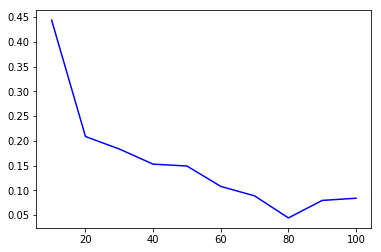

In [7]:
plt.plot(Ks, np.array(ch_scores), 'b-')

总体效果并不好，尤其是当类别多的时候尤其明显，所以再尝试一下pca后的结果

In [8]:
pca = PCA(n_components=0.5)
data = pca.fit_transform(data)
data.shape

(13418, 1)

In [9]:
Ks = [10,20,30,40,50,60,70,80,90,100]
ch_scores = []
for i in Ks:
    score = K_cluster(i,data)
    ch_scores.append(score)

当K的值为: 10时：
CH_score结果为: 0.5692376930435814
当K的值为: 20时：
CH_score结果为: 0.5273573008286377
当K的值为: 30时：
CH_score结果为: 0.527560258268079
当K的值为: 40时：
CH_score结果为: 0.5222323747567976
当K的值为: 50时：
CH_score结果为: 0.5356508918480741
当K的值为: 60时：
CH_score结果为: 0.5384630396848407
当K的值为: 70时：
CH_score结果为: 0.5440145615231674
当K的值为: 80时：
CH_score结果为: 0.5764547683758302
当K的值为: 90时：
CH_score结果为: 0.5719018626769491
当K的值为: 100时：
CH_score结果为: 0.616027011409894


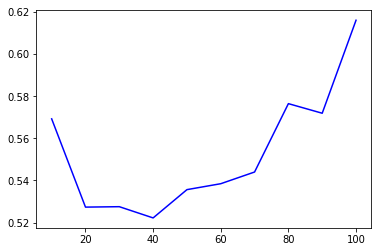

In [10]:
plt.plot(Ks, np.array(ch_scores), 'b-')

显然效果好了很多；当k=100时结果最优